# Regressão Linear

### Importar pandas e matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import random

### Criar um Data Frame de faturamento mensal de 12 meses

In [10]:
random.seed(123)
faturamento = [random.randint(0, 1000) for _ in range(12)] # lista de faturamentos
faturamento


[53, 274, 89, 787, 417, 272, 110, 858, 922, 895, 39, 388]

In [11]:
mes = list(range(1,13)) # meses do ano 

In [12]:
data_dict = {'mes':mes, 'faturamento':faturamento}

In [14]:
data = pd.DataFrame.from_dict(data=data_dict)
data

,mes,faturamento
0,1,53
1,2,274
2,3,89
3,4,787
4,5,417
5,6,272
6,7,110
7,8,858
8,9,922
9,10,895


### Visualizar dados em Gráfico de Dispersão

In [19]:
x = data['mes']
y = data['faturamento']

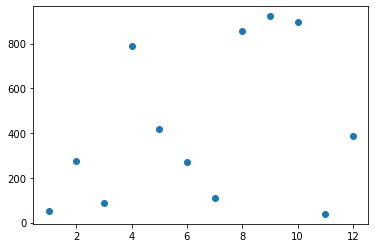

In [21]:
plt.scatter(x, y) # .scatter() é um gráfico de disperção
plt.show()

In [22]:
# correlação entre mes e faturamento
data[['mes', 'faturamento']].corr()

,mes,faturamento
mes,1.0000,0.3276
faturamento,0.3276,1.0000


## Criar Modelo Preditivo aplicando fórmulas (manualmente)

<center><strong>Equação da Regressão Linear</strong></center><br>
Essa é a equação para desenhar uma reta. Mas quando usamos essa equação para criar uma Regressão Linear especificamente, colocamos o acento circunflexo no $\hat{y}$.

$$\hat{y} = mx + b$$

<strong>m</strong> = inclinação da linha<br>
<strong>b</strong> = interceptação do y<br>
<strong>(x,y)</strong> = pontos coordenados<br>

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

$$b = \frac {\sum y-m\sum x}{n}$$

# m

In [36]:
x_soma = x.sum() # somatorio de x
y_soma = y.sum() # somatorio de y
xy_soma =  sum(x*y) # sum([x*y for x, y in zip(x,y)]) também funciona / somatorio de x multiplicado por y
xx_soma = sum(x**2) # sum([i**2 for i in x]) também funciona / somatorio de x multiplicado por x
somaX_somaX = x_soma**2 # somatorio de x ao quadrado

n = len(x)

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

In [34]:
# calculo da inclunação da reta
m = (n*xy_soma - (x_soma*y_soma))/(n*xx_soma - somaX_somaX)
m

31.636363636363637

# b

$$b = \frac {\sum y-m\sum x}{n}$$

In [35]:
# calculo do coeficiente linear da reta
b = (y_soma - m*x_soma)/n

### Modelo Preditivo
Criar modelo preditivo para prever (ou estimar) o rendimento de qualquer mês

$$\hat{y} = mx + b$$

### Predições para os 12 meses
Criar uma lista contendo as predições para cada um dos 12 meses

In [48]:
x_pred = list(range(1, 13))
x_pred

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [49]:
# fazer a previsão dos proximos 12 meses
y_chapeu = [m*i + b for i in x_pred]
y_chapeu

[251.33333333333334,
 282.969696969697,
 314.6060606060606,
 346.24242424242425,
 377.8787878787879,
 409.5151515151515,
 441.1515151515152,
 472.7878787878788,
 504.4242424242425,
 536.0606060606061,
 567.6969696969697,
 599.3333333333334]

## Inserir predições no DataFrame

In [50]:
data['predicoes'] = y_chapeu

In [51]:
data

,mes,faturamento,predicoes
0,1,53,251.333333
1,2,274,282.969697
2,3,89,314.606061
3,4,787,346.242424
4,5,417,377.878788
5,6,272,409.515152
6,7,110,441.151515
7,8,858,472.787879
8,9,922,504.424242
9,10,895,536.060606


### Visualizar Regressão Linear

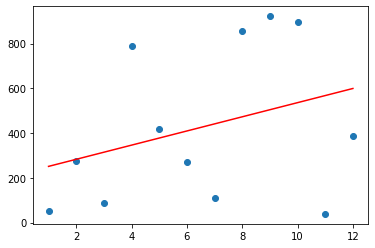

In [52]:
plt.scatter(x, y)
plt.plot(x, y_chapeu, color='r')

# Coeficiente de Determinação - R-quadrado ($R²$)

$$R^2 = 1 - \frac {SQ_{res}} {SQ_{tot}} = 1 - \frac {\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \overline y)^2} $$

In [72]:
def pct(numero):
    return "{:.2f}%".format(numero*100)

In [82]:
# Separando os conjuntos em variáveis
y, y_chapeu  = data['faturamento'], data['predicoes']
y_media = data['faturamento'].mean()

### Calcular Soma Quadrática dos Resíduos (SQres) e Calcular Soma Quadrática Total (SQtot)

In [89]:
SQres = sum((y - y_chapeu)**2) # Soma Quadrática dos resíduos
SQtot = sum((y - y_media)**2) # Soma Quadrática total

### Calcular R-quadrado

In [86]:
# Calculo do R quadrado
R_quadrado = 1 - SQres/SQtot

In [88]:
print("Coeficiente de Determinação:", pct(R_quadrado))

Coeficiente de Determinação: 10.73%


# RMSE
Raiz do Erro Quadrático Médio

$ e = y_i - \hat{y_i} $ <br>

$ RMSE = \sqrt {\sum \frac {e^2}{n}}$<br>



In [93]:
n = len(y) # definindo n

In [109]:
e = y-y_chapeu # calculando e

In [106]:
somatorio = sum((e**2)/12)

### Importar numpy

In [90]:
import numpy as np

In [108]:
RMSE = np.sqrt(somatorio) # Raiz do Erro Quadrático Médio

# Regra Empírica 68-95-99.7

In [114]:
x = data['mes']
y = data['faturamento']

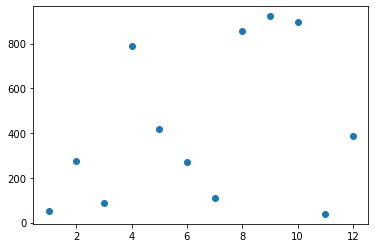

# Um desvio padrão 68% 

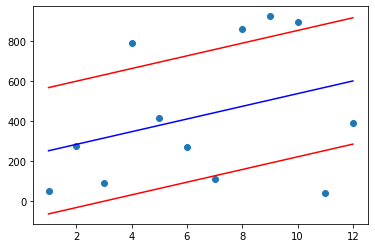

In [122]:
um_acima = data['predicoes'] + RMSE
um_abaixo = data['predicoes'] - RMSE

plt.scatter(x, y)
plt.plot(x, y_chapeu, color='blue')
plt.plot(x, um_acima, color='red')
plt.plot(x, um_abaixo, color='red')

# Dois desvios padrões 95%

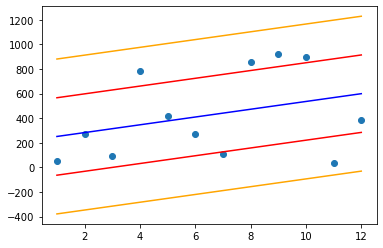

In [125]:
dois_acima = data['predicoes'] + 2*RMSE
dois_abaixo = data['predicoes'] - 2*RMSE

plt.scatter(x, y)
plt.plot(x, y_chapeu, color='blue')
plt.plot(x, um_acima, color='red')
plt.plot(x, um_abaixo, color='red')
plt.plot(x, dois_acima, color='orange')
plt.plot(x, dois_abaixo, color='orange')

# Três desvios padrões 99.7%

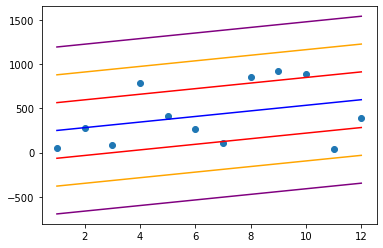

In [127]:
tres_acima = data['predicoes'] + 3*RMSE
tres_abaixo = data['predicoes'] - 3*RMSE

plt.scatter(x, y)
plt.plot(x, y_chapeu, color='blue')
# 68% dos dados estão entre as retas um_acima e um_abaixo
plt.plot(x, um_acima, color='red')
plt.plot(x, um_abaixo, color='red')
# 95% dos dados estão entre as retas dois_acima e dois_abaixo
plt.plot(x, dois_acima, color='orange')
plt.plot(x, dois_abaixo, color='orange')
#99.7% dos dados estão entre as retas tres_acima e tres_abaixo
plt.plot(x, tres_acima, color='purple')
plt.plot(x, tres_abaixo, color='purple')

Como podemos ver o nosso modelo não se adequa bem ao nosso conjunto de dados pois o nosso conjunto não é facilmente aproximado por uma reta, sendo assim, talvez seria melhor usar outros tipos de regressão para chegar a um modelo de pudesse melhor prever a tendencia do nosso conjunto de dados.

# Regressão Linear - Statsmodels

### Importar Statsmodels 

In [129]:
import statsmodels.api as sm

### Definir x e y

In [128]:
x = data['mes']
y = data['faturamento']

### Adicionar constante

In [130]:
x = sm.add_constant(x.values)

### Treinar Modelo

In [132]:
modelo = sm.OLS(y, x).fit()

### Gerar predição

In [135]:
sm_pred = modelo.predict()
sm_pred

array([251.33333333, 282.96969697, 314.60606061, 346.24242424,
       377.87878788, 409.51515152, 441.15151515, 472.78787879,
       504.42424242, 536.06060606, 567.6969697 , 599.33333333])

### Verificar parâmetros de performance do Modelo Preditivo

In [137]:
modelo.summary()

C:\Users\Leonardo\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            faturamento   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.202
Date:                Wed, 06 Jul 2022   Prob (F-statistic):              0.299
Time:                        16:45:57   Log-Likelihood:                -86.057
No. Observations:                  12   AIC:                             176.1
Df Residuals:                      10   BIC:                             177.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        219.6970    212.352      1.035      0.325    -253.452     692.846
x1            31.6364     28.853      1.096      0.299     -32.652      95.925
==============================================================================
Omnibus:                        1.726   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                0.847
Skew:                           0.124   Prob(JB):                        0.655
Kurtosis:                       1.722   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### RMSE

In [138]:
from statsmodels.tools.eval_measures import rmse

In [139]:
rmse(y, sm_pred)

314.968484875307

# Regressão Linear - Sklearn

### Importar sklearn

In [140]:
from sklearn import linear_model

### Instanciar Modelo de Regressão Linear

In [141]:
lm = linear_model.LinearRegression()

### Reshape x (remodelar x)
Se X não possuir múltiplas variáveis, sklearn solicita que modifiquemos o formato

In [143]:
x = data['mes']
y = data['faturamento']

In [145]:
x = np.array(x).reshape(-1, 1)

### Treinar Modelo

In [146]:
sk_model = lm.fit(x, y) 

### Gerar predições

In [147]:
sk_pred = sk_model.predict(x)

### $R^2$

In [148]:
lm.score(x, y)

0.10732195163029956

### m

In [149]:
lm.coef_ # coeficiente angular da reta

array([31.63636364])

### b

In [150]:
lm.intercept_ # coeficiente linear da reta

219.6969696969698

### RMSE

In [152]:
from sklearn.metrics import mean_squared_error 

In [153]:
mse = mean_squared_error(y, sk_pred)

In [155]:
rmse = np.sqrt(mse)
rmse

314.96848487530696

# Todas Predições

### Calculado Manualmente

### Calculado via Statsmodel

### Calculado via Sklearn